## **실습 4. AI 모델링 최적화**
## 본 실습파일은 <u><b>학습자용</u> 입니다.
* 본 과정에서는 웹페이지에서 추출한 Feature(특징) 기반으로 악성사이트를 탐지하는 머신러닝 분류문제를 예제코드를 통해서 해결할 것입니다.
---


### **[실습 프로세스]**
### 0. 데이터 불러오기
### 1. 데이터 전처리
### 2. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리
### 3. GridSearch 활용 AI모델링



# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

* 데이터 프레임 관련 라이브러리

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### **나.  학습데이터 불러오기**

In [28]:
# data = pd.read_csv("r.csv")
# data = data.drop("Unnamed: 0",axis=1)
# train_x=train_x.reset_index()
# test_x=test_x.reset_index()
# train_y=train_y.reset_index()
# test_y=test_y.reset_index()
# train_x = train_x.drop("index",axis=1)
# test_x = test_x.drop("index",axis=1)
# train_y = train_y.drop("index",axis=1)
# test_y = test_y.drop("index",axis=1)
data = pd.read_csv("datadata.csv")
data_val = pd.read_csv("datadata_val.csv")

In [29]:
data = pd.concat([data,data_val], axis=0)
data = data.reset_index()

In [30]:
x=data.drop(['0','1','2','3','4'],axis=1)
y=data[['0','1','2','3','4']]

In [31]:
y=pd.DataFrame(y.values.argmax(axis=1),columns=["label"])
y

,label
0,0
1,4
2,2
3,2
4,1
...,...
3701,4
3702,2
3703,0
3704,4


In [32]:
x

,index,word0,word1,word2,word3,word4,word5,word6,word7,word8,...,word8124,word8125,word8126,word8127,word8128,word8129,word8130,word8131,word8132,word8133
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3702,738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3703,739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3704,740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data = pd.concat([x,y], axis=1)
data

,index,word0,word1,word2,word3,word4,word5,word6,word7,word8,...,word8125,word8126,word8127,word8128,word8129,word8130,word8131,word8132,word8133,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3702,738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3703,739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3704,740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [34]:
data = data.drop(["index"],axis=1)
data

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,...,word8125,word8126,word8127,word8128,word8129,word8130,word8131,word8132,word8133,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [3]:
test = pd.read_csv("test.csv")
test = test.drop("id",axis=1)
# a=["url_len","url_path_len","url_domain_len","url_chinese_present",'url_port',"url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')","html_num_tags('applet')"]
# test.drop(a,axis=1)
test.isnull().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [4]:
test["url_path_len"] = test["url_path_len"].fillna(data["url_path_len"].median())
test["url_domain_len"] = test["url_domain_len"].fillna(data["url_domain_len"].median())
test["url_hostname_len"] = test["url_hostname_len"].fillna(data["url_hostname_len"].median())
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(data["html_num_tags('script')"].median())
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1)
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(data["html_num_tags('a')"].median())
test.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64

In [5]:
j=["url_len","html_num_tags('applet')","url_chinese_present",'url_port',"html_num_tags('div')","html_num_tags('embed')","url_num_query_para"]
test = test.drop(j,axis=1)
test

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,0,80.0,17.0,17.0,4,0,0,0,4.844913,0,5.0,0,1,1,1.0,3.0
1,0,22.0,15.0,15.0,3,1,0,0,4.246157,1,4.0,0,1,1,1.0,16.0
2,0,13.0,20.0,20.0,3,3,0,0,4.612835,0,6.0,3,1,1,0.0,136.0
3,0,14.0,26.0,26.0,2,0,0,0,4.238521,0,4.0,0,1,1,1.0,2.0
4,2,13.0,26.0,26.0,2,0,0,0,4.240669,0,4.0,0,1,1,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0,13.0,17.0,17.0,4,2,0,0,4.738082,1,18.0,0,1,1,1.0,119.0
2437,0,1.0,35.0,35.0,2,0,0,0,4.080351,0,27.0,0,1,1,1.0,16.0
2438,1,23.0,22.0,17.0,2,0,0,0,4.359443,0,8.0,0,1,1,2.0,16.0
2439,0,10.0,14.0,17.0,3,0,0,1,4.260333,0,3.0,0,1,1,2.0,25.0


In [125]:
test["html_num_tags('script')"].median()

4.0

### **다.  데이터 전처리**

In [6]:
x=data.drop("label",axis=1)
y=data[["label"]]
x.shape, y.shape

((3662, 16), (3662, 1))

### **라. train_test_split을 이용하여 train/test  데이터 분리**

- test_size = 0.3
- random_state = 2021

In [7]:
from sklearn.model_selection import train_test_split
train_x ,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2021)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2929, 16), (733, 16), (2929, 1), (733, 1))

### **마. Confusion Matrix 함수 정의**
#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.

**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [3]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)

---

# <b>RandomForest GridSearchCV
### 만족할만한 하이퍼파라미터 조합을 찾는 단순한 방법은 수동으로 하이퍼파라미터를 조정하면서 찾는 방법입니다.
### GridSearchcv는 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적의 하이퍼파라미터를 탐색해 줍니다.
### 탐색하고자 하는 하이퍼파라미터를 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 됩니다.


* 주요 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">param_grid</td><td>파라미터 딕셔너리</td>
    </tr>
    <tr>
        <td align="center">scoring</td><td>예측 성능을 측정할 평가 방법</td>
    </tr>
    <tr>
        <td align="center">cv</td><td>교차 검증을 위해 분할되는 폴드 수</td>
    </tr>
</table>

**<span style="color:green">[참고링크] 공식 Document**</span>
 
* GridSearchCV(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* model evaluation(https://scikit-learn.org/stable/modules/model_evaluation.html)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [118]:
model = RandomForestClassifier(random_state=2021)
params={"max_depth":range(5,51),"n_estimators":[100,200,300]}
model1 = GridSearchCV(model,params,cv=5,scoring="f1",n_jobs=-1)
model1.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 51),
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [129]:
print(model1.best_params_)
print(model1.best_score_) 

{'max_depth': 22, 'n_estimators': 200}
0.9634370658172176


In [134]:
y_pred_rfgrid = model1.predict(test)

In [178]:
model1.best_estimator_

RandomForestClassifier(max_depth=22, n_estimators=200, random_state=2021)

In [179]:
a=pd.DataFrame(data=list(x),columns=['feature'])
a["가중치"] = model1.best_estimator_.feature_importances_
a.sort_values("가중치",ascending=False)

,feature,가중치
1,url_path_len,0.181310
15,html_num_tags('a'),0.178969
14,html_num_tags('form'),0.142307
3,url_hostname_len,0.104054
2,url_domain_len,0.082348
10,html_num_tags('script'),0.080646
4,url_num_dots,0.060287
8,url_entropy,0.052570
0,url_num_hyphens_dom,0.037569
6,url_query_len,0.029554


In [135]:
result = pd.DataFrame(y_pred_rfgrid,columns=["label"])
result = np.where(result["label"]==1,"malicious","benign")
# result["id"] = 
result = pd.DataFrame(result,columns=["label"])
result.to_csv("result.csv")

In [136]:
p=pd.read_csv("result.csv")
p.columns = ['id', 'label']
p.to_csv("result2.csv",index=False)

In [38]:
accuracy_score(test_y,y_pred_rfgrid)

0.9413369713506139

In [39]:
confusion_matrix(test_y,y_pred_rfgrid)

array([[360,  19],
       [ 24, 330]], dtype=int64)

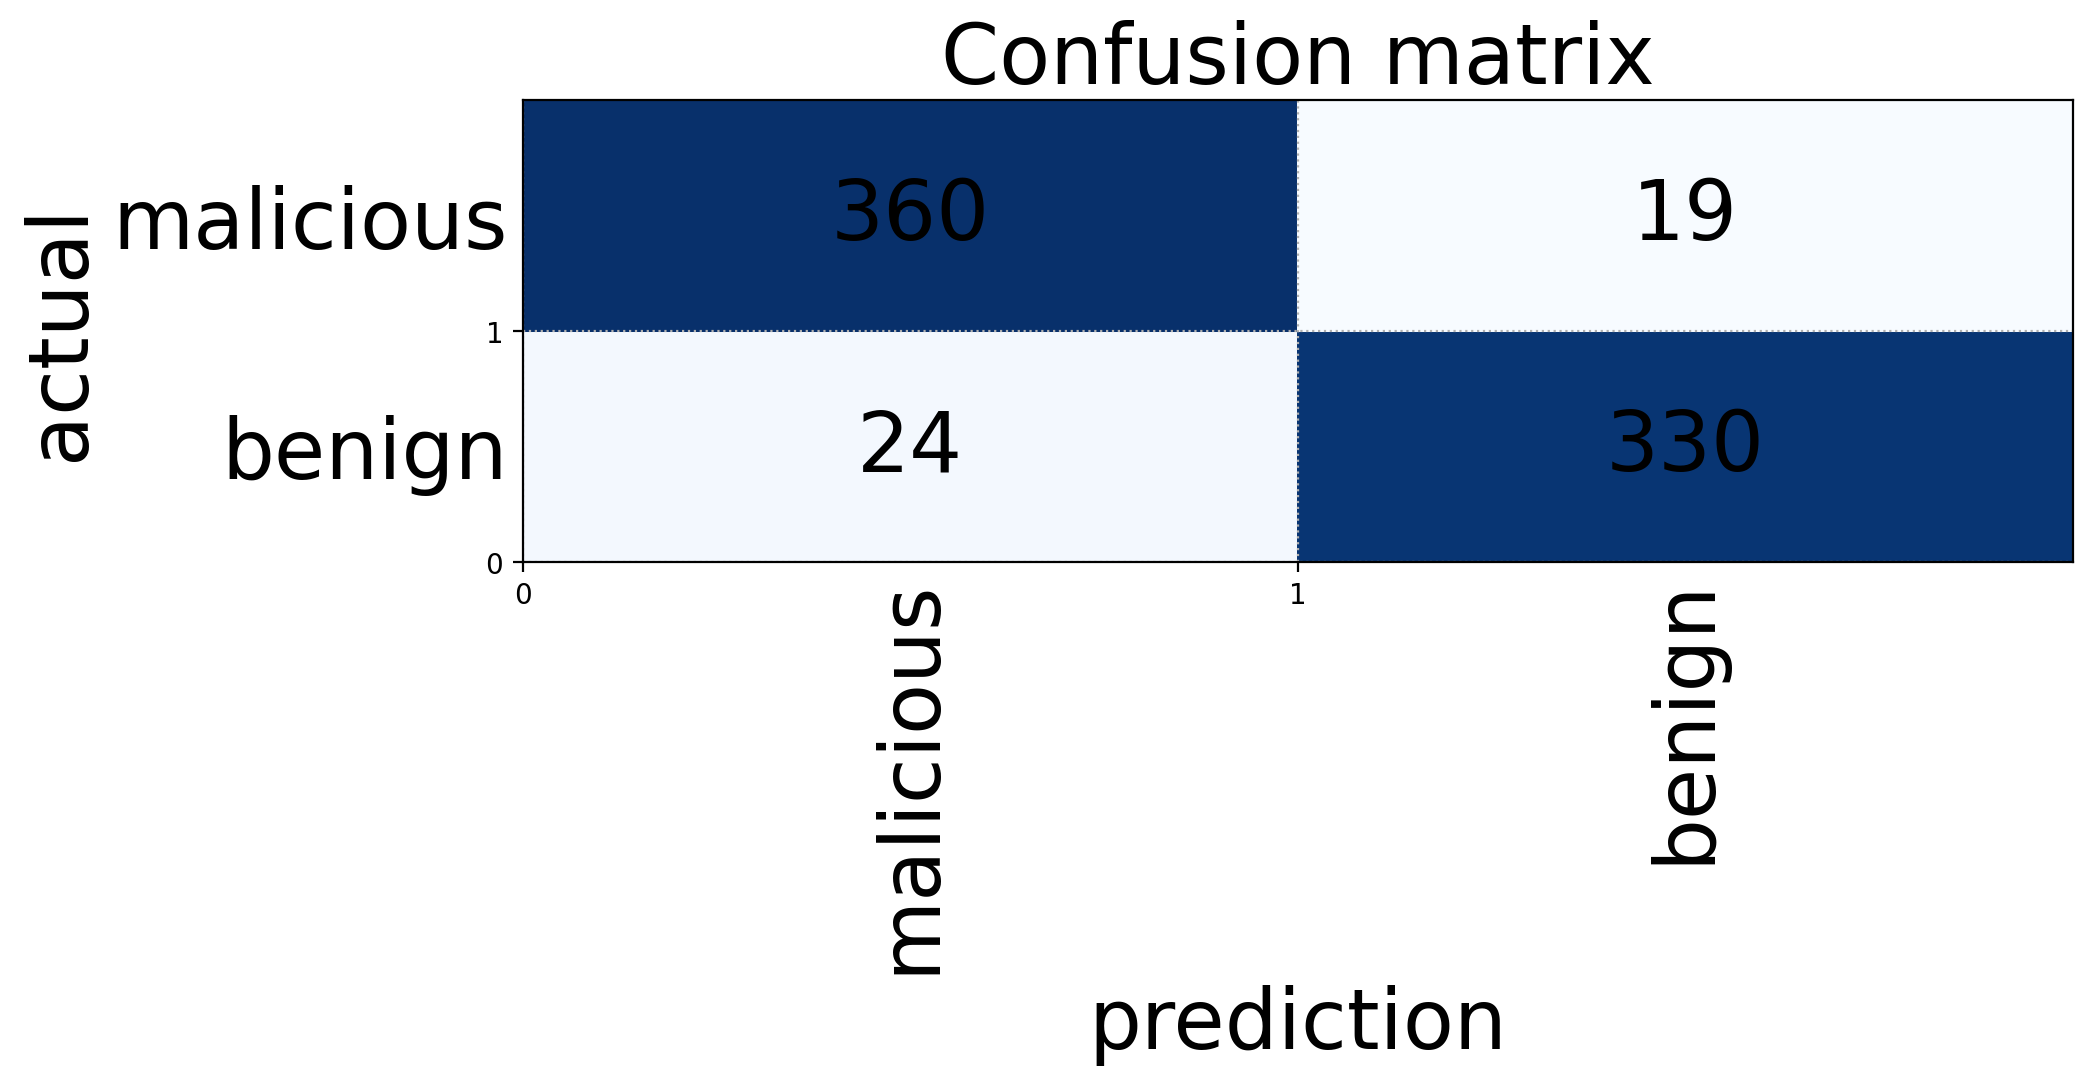

In [40]:
confusion = confusion_matrix(test_y, y_pred_rfgrid)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [41]:
f1_score(test_y,y_pred_rfgrid)

0.9388335704125177

In [120]:
model2 = XGBClassifier(random_state=2021)
params={"max_depth":range(10,51),"n_estimators":[100,200,300]}
model3 = GridSearchCV(model2,params,cv=5,scoring="f1",n_jobs=-1)
model3.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2021, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 51),
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [121]:
print(model3.best_params_)
print(model3.best_score_) 

{'max_depth': 15, 'n_estimators': 100}
0.9621790581306137


In [86]:
y_pred_xgbgrid = model3.predict(test)

In [87]:
result = pd.DataFrame(y_pred_xgbgrid,columns=["label"])
result = np.where(result["label"]==1,"malicious","benign")
# result["id"] = 
result = pd.DataFrame(result,columns=["label"])
result.to_csv("result9.csv")

In [88]:
o=pd.read_csv("result9.csv")
o.columns = ['id', 'label']
o.to_csv("result8.csv",index=False)

In [45]:
accuracy_score(test_y,y_pred_xgbgrid)

0.937244201909959

In [46]:
confusion_matrix(test_y,y_pred_xgbgrid)

array([[359,  20],
       [ 26, 328]], dtype=int64)

In [47]:
f1_score(test_y,y_pred_xgbgrid)

0.9344729344729344

In [7]:
from catboost import CatBoostClassifier
# model=CatBoostClassifier()
# model.fit(x,y)
# y_pred_cat=model.predict(test)

In [149]:
result = pd.DataFrame(y_pred_cat,columns=["label"])
result = np.where(result["label"]==1,"malicious","benign")
# result["id"] = 
result = pd.DataFrame(result,columns=["label"])
result.to_csv("result.csv")

In [150]:
p=pd.read_csv("result.csv")
p.columns = ['id', 'label']
p.to_csv("resultcat.csv",index=False)

In [218]:
from sklearn.model_selection import train_test_split
train_x ,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2021)
train_x.shape, test_x.shape, train_y.shape, test_y.shape
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_x)
train_x_scal = scale.transform(train_x)
test_x_scal = scale.transform(test_x)


In [210]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_x_scal)
pca_score = pca.transform(train_x_scal)
pca.components_

array([[ 4.69036920e-01, -1.06857490e-01,  5.88233332e-01,
         5.89644148e-01,  1.79061222e-02, -5.57537217e-02,
         5.41518432e-02, -1.58558046e-01,  1.59662731e-01,
        -2.40698546e-02, -1.08703578e-01, -4.48188948e-02,
         1.44795396e-02,  2.52418435e-02,  2.56023005e-02,
        -4.45640475e-02],
       [-8.33577970e-02,  3.20325140e-01, -2.60086418e-02,
        -2.68513776e-02,  4.18196505e-01,  4.73195097e-01,
         4.25111271e-01,  7.39138306e-03,  4.41223278e-01,
        -1.17602614e-01, -2.12910440e-01, -4.91794774e-02,
         4.38580062e-02,  1.11277384e-01, -1.76243014e-01,
        -8.85668191e-02],
       [-6.27503718e-03,  1.48441127e-01, -2.11670217e-03,
         4.49244676e-03, -3.62498327e-02,  1.33716325e-01,
         1.53736501e-01, -3.14765669e-01,  1.78247380e-01,
         4.34952144e-01,  5.28297211e-01,  3.11883612e-02,
         1.77474303e-01,  1.92108298e-01,  4.54201672e-01,
         2.45492793e-01],
       [-8.00499511e-03, -1.50814864e

In [211]:
pca.explained_variance_ratio_

array([1.63882883e-01, 1.21460383e-01, 9.33707445e-02, 7.49995899e-02,
       7.01727757e-02, 6.67889640e-02, 6.37477859e-02, 5.77317821e-02,
       5.22093011e-02, 4.80321301e-02, 4.31242043e-02, 4.25920447e-02,
       3.79922012e-02, 3.64346264e-02, 2.74060845e-02, 5.44996673e-05])

In [212]:
pca = PCA(n_components=16)
pc=pca.fit_transform(x)
pc_y = np.c_[pc,y]
principalDF = pd.DataFrame(pc_y,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","label"])
principalDF
x2=principalDF[["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16"]]
y2=principalDF[["label"]]
from sklearn.model_selection import train_test_split
train_x2 ,test_x2,train_y2,test_y2=train_test_split(x2,y2,test_size=0.2,random_state=2021)

In [ ]:
test = pd.read_csv("test.csv")
test = test.drop("id",axis=1)
# a=["url_len","url_path_len","url_domain_len","url_chinese_present",'url_port',"url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')","html_num_tags('applet')"]
# test.drop(a,axis=1)
test.isnull().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [213]:
pca.explained_variance_ratio_

array([9.42477706e-01, 4.95909861e-02, 5.15103792e-03, 1.52634163e-03,
       1.19689860e-03, 1.91461044e-05, 1.68991042e-05, 8.34292664e-06,
       5.92717243e-06, 3.54688410e-06, 1.04728300e-06, 8.14189417e-07,
       4.47608433e-07, 4.05595336e-07, 2.99505065e-07, 1.53421282e-07])

In [183]:
len(train_x_scal)

2929

In [214]:
train_x2 = pd.DataFrame(train_x2,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16"])
train_y2 = pd.DataFrame(train_y2,columns=["label"])
train_x2.shape, train_y2.shape

((2929, 16), (2929, 1))

In [215]:

test_x2 = pd.DataFrame(test_x2,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16"])
test_y2 = pd.DataFrame(test_y2,columns=["label"])

In [239]:
# train_y["label"] = np.where(train_y["label"]==1,"malicious","benign")
# test_y["label"] = np.where(test_y["label"]==1,"malicious","benign")
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]} # 알파 값 후보 리스트
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)
model.fit(train_x,train_y)
# y_pred_na = model.predict(test_x)
# f1_score(test_y,y_pred_na)

MultinomialNB()

In [161]:
set(y_pred_na)

{'benign'}

In [240]:
# print(model.best_params_)
# print(model.best_score_) 
y_pred=model.predict(test_x)

In [241]:
f1_score(test_y,y_pred)

0.7221570926143024

In [242]:
data1 = data.drop("url")

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,1.0,1.0,0.0,0.0,1
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,1.0,1.0,0.0,21.0,0
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,1.0,1.0,3.0,70.0,0
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,1.0,1.0,1.0,55.0,0
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1
3658,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,1.0,1.0,3.0,475.0,0
3659,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,4.693343,0.0,13.0,0.0,1.0,1.0,2.0,103.0,1
3660,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 데이터 로딩
df = pd.read_csv('r.csv')

# 독립변수와 종속변수로 데이터 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 학습용과 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

# Bernoulli Naive Bayes 모델 객체 생성
model = CatBoostClassifier(iterations=1000,verbose=0)

# 학습
model.fit(X_train, y_train)

# 검증용 데이터 예측
y_pred = model.predict(X_test)

# # # threshold 변경 후 검증용 데이터 예측
for th in np.arange(0.43, 0.48, 0.01):
    y_pred_th = (model.predict_proba(X_test)[:, 1] > th).astype(float)
    cm = confusion_matrix(y_test, y_pred_th)
    f1 = f1_score(y_test, y_pred_th)
    print(f"Threshold: {th:.2f}, Confusion Matrix:\n{cm}")
    print(f1)

Threshold: 0.43, Confusion Matrix:
[[365  14]
 [  6 348]]
0.9720670391061453
Threshold: 0.44, Confusion Matrix:
[[365  14]
 [  7 347]]
0.9706293706293707
Threshold: 0.45, Confusion Matrix:
[[365  14]
 [  9 345]]
0.967741935483871
Threshold: 0.46, Confusion Matrix:
[[366  13]
 [  9 345]]
0.9691011235955057
Threshold: 0.47, Confusion Matrix:
[[367  12]
 [ 10 344]]
0.9690140845070423


In [9]:
model.predict_proba(X_test)

array([[0.118799  , 0.881201  ],
       [0.00123502, 0.99876498],
       [0.00226844, 0.99773156],
       ...,
       [0.99757504, 0.00242496],
       [0.99554477, 0.00445523],
       [0.99800821, 0.00199179]])

In [289]:
model.predict_proba(X_test)[:, 1]

array([8.81201001e-01, 9.98764985e-01, 9.97731563e-01, 9.77690913e-01,
       6.59628212e-02, 2.71416142e-02, 9.76343774e-01, 3.31699063e-03,
       6.96562437e-01, 9.99843711e-01, 9.47434779e-01, 9.89533793e-01,
       1.55247064e-02, 1.29759271e-02, 9.96879957e-01, 9.83390186e-01,
       2.66283015e-03, 9.21246017e-01, 9.22561742e-01, 5.28199071e-02,
       4.26827109e-03, 4.94561219e-03, 2.25538333e-02, 9.98854848e-01,
       9.79696615e-01, 8.26917419e-01, 1.67366160e-03, 9.90202215e-01,
       1.42780579e-01, 2.25909251e-01, 2.41056939e-02, 7.04897085e-04,
       1.59840697e-02, 9.99702310e-01, 8.57279460e-01, 9.97364667e-01,
       1.78075394e-02, 2.06382353e-01, 9.29218592e-04, 2.93640565e-01,
       1.27820031e-03, 9.95339239e-01, 9.22205986e-01, 2.55335134e-03,
       8.03623080e-01, 1.83806742e-01, 6.48220150e-04, 9.98254260e-01,
       8.23892726e-01, 8.34295168e-03, 2.35806689e-01, 9.71608362e-01,
       9.99384703e-01, 1.57529889e-02, 1.60862446e-03, 4.69194126e-02,
      

In [12]:
(model.predict_proba(X_test)[:, 1]>0.49).astype(int)

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [264]:
y_pred_th = (model.predict_proba(test)[:, 1] > 0.4).astype(int)

In [265]:
result = pd.DataFrame(y_pred_th,columns=["label"])
result = np.where(result["label"]==1,"malicious","benign")
# result["id"] = 
result = pd.DataFrame(result,columns=["label"])
result.to_csv("result.csv")

In [267]:
p=pd.read_csv("result.csv")
p.columns = ['id', 'label']
p.to_csv("result05.csv",index=False)

In [8]:
!pip install pycaret[full]

^C


  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Using cached importlib_metadata-6.1.0-py3-none-any.whl (21 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sktime-0.17.0-py3-none-any.whl (16.1 MB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached schemdraw-0.16-py3-none-any.whl (105 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\dufwn\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [2]:
from pycaret.datasets import get_data

ModuleNotFoundError: No module named 'pycaret'

In [12]:
import sklearn
sklearn.__version__

     ------------------------------------- 481.8/481.8 kB 15.2 MB/s eta 0:00:00
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     ---------------------------------------- 46.4/46.4 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
     -------------------------------------- 138.3/138.3 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 2.2 MB/s eta 0:00:00
     --------------------------------------- 15.3/15.3 MB 26.2 MB/s eta 0:00:00
     -------------------------------------- 105.8/105.8 kB 6.0 MB/s eta 0:00:00
  Using c

'1.2.2'

In [13]:
import sklearn
sklearn.__version__

ModuleNotFoundError: No module named 'numpy.testing'

In [10]:
from pycaret.datasets import get_data

ModuleNotFoundError: No module named 'pycaret'

In [7]:
!pip install pycaret 


^C


In [6]:
from pycaret.datasets import get_data
dataset = get_data('credit')
dataset.shape

ModuleNotFoundError: No module named 'pycaret'

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

In [6]:
data_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
39,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
57,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
72,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
103,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,50000,1,2,1,37,1,2,2,2,0,...,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
23979,220000,1,2,1,41,0,0,-1,-1,-2,...,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
23981,420000,1,1,2,34,0,0,0,0,0,...,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
23985,90000,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1


In [30]:
y.values

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]], dtype=int64)

In [36]:
from imblearn.over_sampling import RandomOverSampler

# Over Sampling
over_sample = RandomOverSampler()
o_x_train, o_y_train = over_sample.fit_resample(x.values, y.values)

# 확인
print('전:', y.shape)
print('후:', o_y_train.shape)
print(o_x_train.shape)

전: (3706, 5)
후: (7925, 5)
(7925, 8134)


In [40]:
o_x_train=pd.DataFrame(o_x_train,columns=[f"word{i}" for i in range(o_x_train.shape[1])])
o_y_train=pd.DataFrame(o_y_train,columns=[0,1,2,3,4])

In [1]:
data = pd.concat([o_x_train,o_y_train.argmax(axis=1)],axis=1)
data.shape

NameError: name 'pd' is not defined

In [45]:
x=data.drop([0,1,2,3,4],axis=1)
y=data[[0,1,2,3,4]]

In [16]:
import cudf
from cuml.cluster import DBSCAN


ModuleNotFoundError: No module named 'cudf'

In [35]:
from pycaret.classification import *
exp_clf = setup(data = data, target="label", session_id = 42)

In [36]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:10:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


KeyboardInterrupt: 

In [23]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9377,0.9888,0.9531,0.9242,0.9385,0.8755,0.8759
1,0.9339,0.9862,0.9375,0.9302,0.9339,0.8677,0.8677
2,0.9728,0.9960,0.9766,0.9690,0.9728,0.9455,0.9456
3,0.9453,0.9927,0.9375,0.9524,0.9449,0.8906,0.8907
4,0.9648,0.9937,0.9531,0.9760,0.9644,0.9297,0.9299
5,0.9531,0.9947,0.9453,0.9603,0.9528,0.9062,0.9064
6,0.9570,0.9940,0.9449,0.9677,0.9562,0.9140,0.9143
7,0.9648,0.9931,0.9606,0.9683,0.9644,0.9297,0.9297
8,0.9531,0.9907,0.9449,0.9600,0.9524,0.9062,0.9063


In [24]:
tuned_rf = tune_model(rf,optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9105,0.9752,0.9297,0.8947,0.9119,0.8210,0.8217
1,0.9144,0.9757,0.9141,0.9141,0.9141,0.8288,0.8288
2,0.9650,0.9916,0.9844,0.9474,0.9655,0.9300,0.9307
3,0.9375,0.9837,0.9375,0.9375,0.9375,0.8750,0.8750
4,0.9609,0.9915,0.9531,0.9683,0.9606,0.9219,0.9220
5,0.9297,0.9855,0.9375,0.9231,0.9302,0.8594,0.8595
6,0.9453,0.9899,0.9370,0.9520,0.9444,0.8906,0.8907
7,0.9453,0.9865,0.9213,0.9669,0.9435,0.8906,0.8916
8,0.9336,0.9843,0.9213,0.9435,0.9323,0.8672,0.8674


In [10]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.9895,0.9375,0.9449,0.9412,0.8833,0.8833
1,0.9533,0.9907,0.9453,0.9603,0.9528,0.9066,0.9067
2,0.9767,0.9963,0.9766,0.9766,0.9766,0.9533,0.9533
3,0.9570,0.9954,0.9609,0.9535,0.9572,0.9141,0.9141
4,0.9453,0.9935,0.9375,0.9524,0.9449,0.8906,0.8907
5,0.9336,0.9914,0.9531,0.9173,0.9349,0.8672,0.8678
6,0.9609,0.9950,0.9528,0.9680,0.9603,0.9219,0.9220
7,0.9727,0.9921,0.9685,0.9762,0.9723,0.9453,0.9453
8,0.9414,0.9893,0.9528,0.9308,0.9416,0.8828,0.8831


In [16]:
tuned_lightgbm = tune_model(lightgbm,optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.9843,0.9453,0.9380,0.9416,0.8833,0.8833
1,0.9377,0.9880,0.9141,0.9590,0.9360,0.8755,0.8764
2,0.9572,0.9913,0.9531,0.9606,0.9569,0.9144,0.9144
3,0.9688,0.9941,0.9609,0.9762,0.9685,0.9375,0.9376
4,0.9688,0.9927,0.9531,0.9839,0.9683,0.9375,0.9380
5,0.9453,0.9908,0.9609,0.9318,0.9462,0.8906,0.8911
6,0.9570,0.9897,0.9606,0.9531,0.9569,0.9141,0.9141
7,0.9570,0.9866,0.9528,0.9603,0.9565,0.9141,0.9141
8,0.9453,0.9858,0.9449,0.9449,0.9449,0.8906,0.8906


In [12]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
best_model_2 = compare_models(n_select=2)
blender_2 = blend_models(best_model_2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9377,0.9905,0.9375,0.9375,0.9375,0.8755,0.8755
1,0.9416,0.9891,0.9453,0.9380,0.9416,0.8833,0.8833
2,0.9805,0.9961,0.9766,0.9843,0.9804,0.9611,0.9611
3,0.9531,0.9940,0.9609,0.9462,0.9535,0.9062,0.9064
4,0.9531,0.9929,0.9531,0.9531,0.9531,0.9062,0.9062
5,0.9414,0.9929,0.9531,0.9313,0.9421,0.8828,0.8831
6,0.9688,0.9944,0.9606,0.9760,0.9683,0.9375,0.9376
7,0.9688,0.9933,0.9606,0.9760,0.9683,0.9375,0.9376
8,0.9375,0.9905,0.9449,0.9302,0.9375,0.8750,0.8751


In [18]:
final_model = finalize_model(tuned_lightgbm)
prediction = predict_model(final_model, data = test)

In [19]:
prediction

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Label,Score
0,0,80.0,17.0,17.0,4,0,0,0,4.844913,0,5.0,0,1,1,1.0,3.0,0,0.9511
1,0,22.0,15.0,15.0,3,1,0,0,4.246157,1,4.0,0,1,1,1.0,16.0,1,0.8879
2,0,13.0,20.0,20.0,3,3,0,0,4.612835,0,6.0,3,1,1,0.0,136.0,0,0.9947
3,0,14.0,26.0,26.0,2,0,0,0,4.238521,0,4.0,0,1,1,1.0,2.0,1,0.9228
4,2,13.0,26.0,26.0,2,0,0,0,4.240669,0,4.0,0,1,1,1.0,16.0,1,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0,13.0,17.0,17.0,4,2,0,0,4.738082,1,18.0,0,1,1,1.0,119.0,0,0.9984
2437,0,1.0,35.0,35.0,2,0,0,0,4.080351,0,27.0,0,1,1,1.0,16.0,1,0.9999
2438,1,23.0,22.0,17.0,2,0,0,0,4.359443,0,8.0,0,1,1,2.0,16.0,1,0.9945
2439,0,10.0,14.0,17.0,3,0,0,1,4.260333,0,3.0,0,1,1,2.0,25.0,1,0.9895


In [21]:
final_model2 = finalize_model(blender_2)
prediction2 = predict_model(final_model2, data = test)

In [22]:
prediction2

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Label,Score
0,0,80.0,17.0,17.0,4,0,0,0,4.844913,0,5.0,0,1,1,1.0,3.0,0,0.7458
1,0,22.0,15.0,15.0,3,1,0,0,4.246157,1,4.0,0,1,1,1.0,16.0,1,0.8003
2,0,13.0,20.0,20.0,3,3,0,0,4.612835,0,6.0,3,1,1,0.0,136.0,0,0.9149
3,0,14.0,26.0,26.0,2,0,0,0,4.238521,0,4.0,0,1,1,1.0,2.0,1,0.8433
4,2,13.0,26.0,26.0,2,0,0,0,4.240669,0,4.0,0,1,1,1.0,16.0,1,0.9481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0,13.0,17.0,17.0,4,2,0,0,4.738082,1,18.0,0,1,1,1.0,119.0,0,0.8942
2437,0,1.0,35.0,35.0,2,0,0,0,4.080351,0,27.0,0,1,1,1.0,16.0,1,0.9970
2438,1,23.0,22.0,17.0,2,0,0,0,4.359443,0,8.0,0,1,1,2.0,16.0,1,0.8656
2439,0,10.0,14.0,17.0,3,0,0,1,4.260333,0,3.0,0,1,1,2.0,25.0,1,0.9546


In [27]:
blender_22 = blend_models(estimator_list = [tuned_lightgbm, tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9339,0.9815,0.9375,0.9302,0.9339,0.8677,0.8677
1,0.9377,0.9867,0.9219,0.9516,0.9365,0.8755,0.8759
2,0.9650,0.9920,0.9609,0.9685,0.9647,0.9300,0.9300
3,0.9609,0.9933,0.9531,0.9683,0.9606,0.9219,0.9220
4,0.9648,0.9932,0.9531,0.9760,0.9644,0.9297,0.9299
5,0.9414,0.9916,0.9453,0.9380,0.9416,0.8828,0.8828
6,0.9570,0.9913,0.9528,0.9603,0.9565,0.9141,0.9141
7,0.9492,0.9879,0.9370,0.9597,0.9482,0.8984,0.8987
8,0.9453,0.9879,0.9370,0.9520,0.9444,0.8906,0.8907


In [28]:
final_model = finalize_model(blender_22)
prediction3 = predict_model(final_model, data = test)

In [29]:
prediction3

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Label,Score
0,0,80.0,17.0,17.0,4,0,0,0,4.844913,0,5.0,0,1,1,1.0,3.0,0,0.6423
1,0,22.0,15.0,15.0,3,1,0,0,4.246157,1,4.0,0,1,1,1.0,16.0,1,0.7643
2,0,13.0,20.0,20.0,3,3,0,0,4.612835,0,6.0,3,1,1,0.0,136.0,0,0.9440
3,0,14.0,26.0,26.0,2,0,0,0,4.238521,0,4.0,0,1,1,1.0,2.0,1,0.9052
4,2,13.0,26.0,26.0,2,0,0,0,4.240669,0,4.0,0,1,1,1.0,16.0,1,0.9683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0,13.0,17.0,17.0,4,2,0,0,4.738082,1,18.0,0,1,1,1.0,119.0,0,0.9151
2437,0,1.0,35.0,35.0,2,0,0,0,4.080351,0,27.0,0,1,1,1.0,16.0,1,0.9614
2438,1,23.0,22.0,17.0,2,0,0,0,4.359443,0,8.0,0,1,1,2.0,16.0,1,0.9164
2439,0,10.0,14.0,17.0,3,0,0,1,4.260333,0,3.0,0,1,1,2.0,25.0,1,0.8693


In [9]:
from supervised.automl import AutoML
automl = AutoML()
automl.fit(train_x, train_y)

AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.693102 trained in 0.42 seconds
2_DecisionTree logloss 0.38666 trained in 15.24 seconds
3_Linear logloss 0.410194 trained in 3.53 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.112267 trained in 5.09 seconds
5_Default_NeuralNetwork logloss 0.326852 trained in 2.09 seconds
6_Default_RandomForest logloss 0.248509 trained in 4.22 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.110462 trained in 1.34 seconds
AutoML fit time: 43.04 seconds
AutoML best model: Ensemble


AutoML()

In [11]:
y_pred = automl.predict(test_x)

In [12]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(test_y,y_pred))
print(f1_score(test_y,y_pred))

0.965893587994543
0.9648382559774966
